In [33]:
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
np.random.seed(0)

%matplotlib inline




In [5]:
data = pd.read_csv("data/balance.csv",index_col=0)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


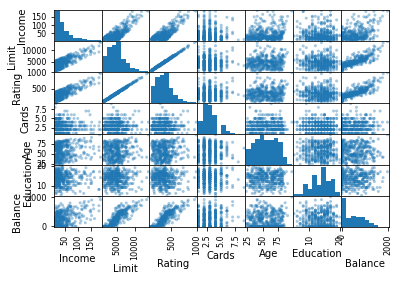

In [7]:
pd.plotting.scatter_matrix(data,alpha=0.4);

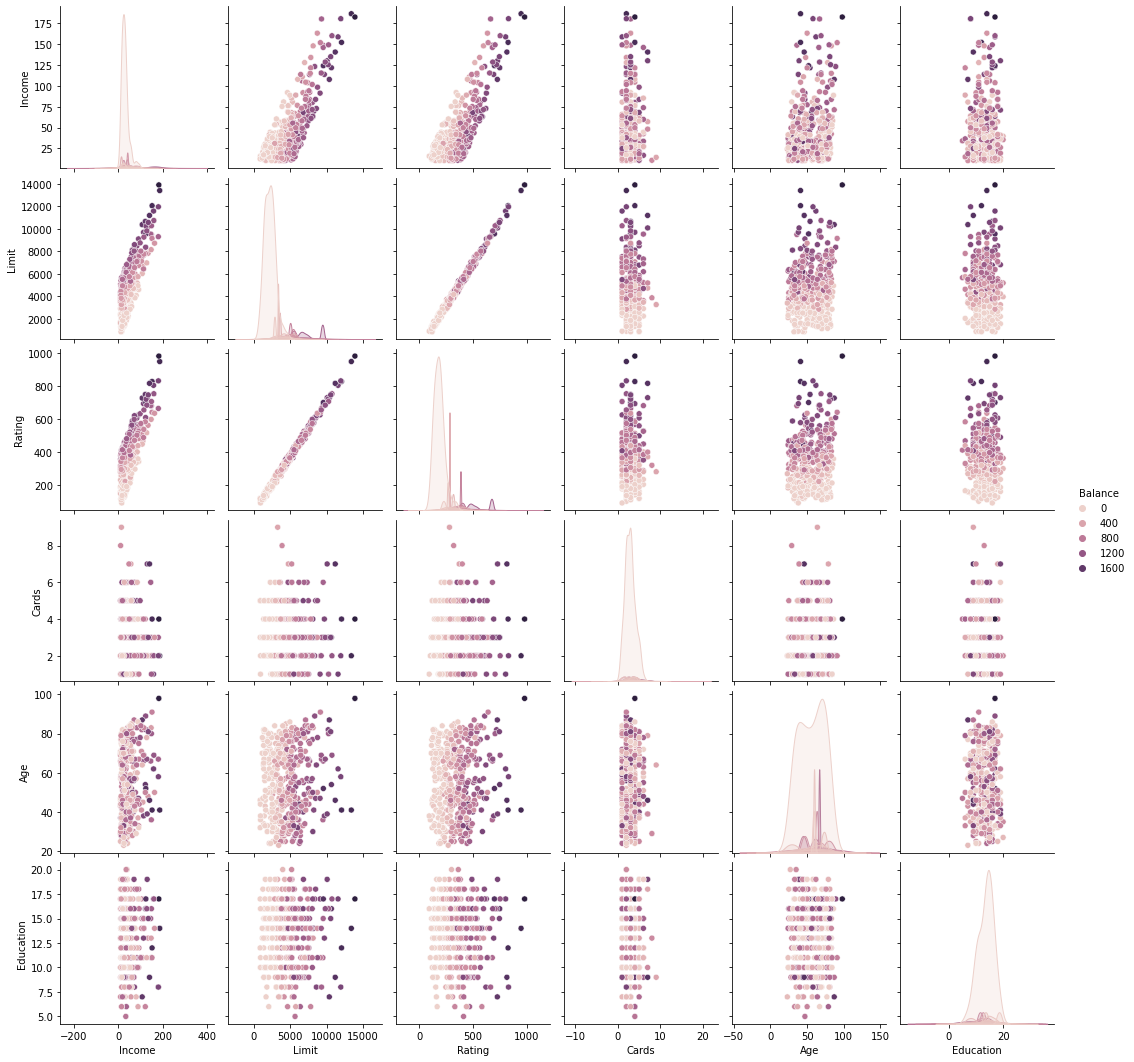

In [10]:
sns.pairplot(data,hue='Balance')
plt.show()

In [11]:
data["Gender"]=pd.Series(np.searchsorted(["Male","Female"], data.Gender.values), data.index)

In [12]:
data.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,0,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,0,No,No,Asian,580


In [13]:
data["Married"]=pd.Series(np.searchsorted(["Yes","No"], data.Married.values), data.index)
data.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,No,2,Caucasian,333
2,106.025,6645,483,3,82,15,0,Yes,2,Asian,903
3,104.593,7075,514,4,71,11,0,No,0,Asian,580


In [14]:
data["Student"]=pd.Series(np.searchsorted(["Yes","No"], data.Student.values), data.index)
data.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,0,2,Caucasian,333
2,106.025,6645,483,3,82,15,0,2,2,Asian,903
3,104.593,7075,514,4,71,11,0,0,0,Asian,580


In [15]:
df1=pd.get_dummies(data.Ethnicity)
df1.head(3)

,African American,Asian,Caucasian
1,0,0,1
2,0,1,0
3,0,1,0


In [16]:
df1.drop("African American", axis="columns", inplace=True)
df1.head(3)

,Asian,Caucasian
1,0,1
2,1,0
3,1,0


In [17]:
df2=pd.concat([data,df1], axis=1)
df2.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,0,0,2,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,0,2,2,Asian,903,1,0
3,104.593,7075,514,4,71,11,0,0,0,Asian,580,1,0


In [18]:
y=df2["Balance"]
y

1      333
2      903
3      580
4      964
5      331
      ... 
396    560
397    480
398    138
399      0
400    966
Name: Balance, Length: 400, dtype: int64

In [19]:
X=df2.drop(["Balance", "Ethnicity"], axis="columns")
X.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Asian,Caucasian
1,14.891,3606,283,2,34,11,0,0,2,0,1
2,106.025,6645,483,3,82,15,0,2,2,1,0
3,104.593,7075,514,4,71,11,0,0,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.25)

In [21]:
model=LinearRegression()
regressor = model.fit(X_train, y_train)

In [22]:
#model.coef_
yhat=regressor.predict(X_test)
yhat

array([ 861.13260006,  842.86173751,  470.2430364 ,  749.98287431,
        309.27798672,  654.92252067, -173.84831836, 1066.14030787,
        638.46594244,  698.37932576, 1027.58004943,  860.65292178,
        779.29309223, -256.34161185,  324.43604784,  575.20519357,
       1570.01769386, 1317.76309981,  -18.09905393,  605.30893955,
        105.91810123, -260.41748297,  -32.98795809,  682.97092271,
        -66.03027282,  848.3352669 ,  463.62199635,   64.90073511,
       -175.4209738 , 1443.30747183, -163.26495561,  473.67407415,
        613.10863734,  996.38025313,  618.0600096 ,  572.96946683,
        977.19700568,  693.43781881, 1174.97710273,  952.57906822,
        340.81379469,  356.29451274,  295.33290103,  916.90598943,
        282.71383373, -163.60277053,  615.87266346,  228.51201815,
        684.27532495,   65.32815375, -124.93022583,  178.45208856,
        -69.28281788,  348.14375872,  566.04794818, -211.5127893 ,
        640.78913453, 1282.45381466,  694.17289164, 1006.64655

In [25]:
r2_score(y_test, yhat)

0.957491580410806

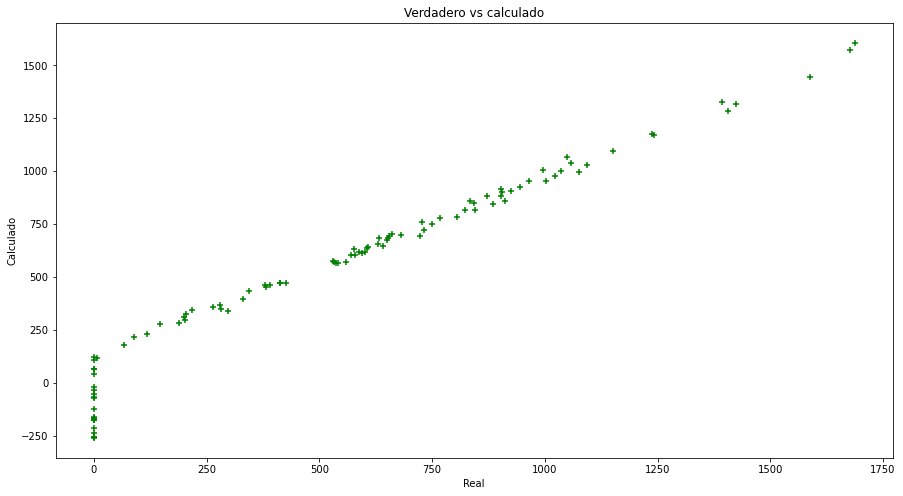

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, yhat, color="green", marker="+", s=45)
ax.set_title("Verdadero vs calculado")
ax.set_ylabel("Calculado")
ax.set_xlabel("Real");

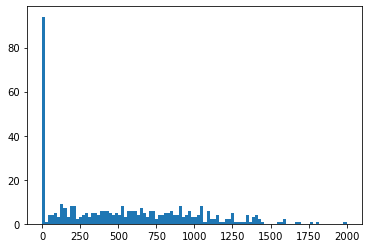

In [27]:
plt.hist(df2.Balance, 100);

In [28]:
pt3 = df2;
pt3["Is_zero"] = np.nan; 
pt3.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,Caucasian,Is_zero
1,14.891,3606,283,2,34,11,0,0,2,Caucasian,333,0,1,NaN
2,106.025,6645,483,3,82,15,0,2,2,Asian,903,1,0,NaN
3,104.593,7075,514,4,71,11,0,0,0,Asian,580,1,0,NaN


In [29]:
pt3["Is_zero"] = np.where(pt3["Balance"]==0, True, False);
pt3.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,Caucasian,Is_zero
1,14.891,3606,283,2,34,11,0,0,2,Caucasian,333,0,1,False
2,106.025,6645,483,3,82,15,0,2,2,Asian,903,1,0,False
3,104.593,7075,514,4,71,11,0,0,0,Asian,580,1,0,False


In [30]:
pt3["Asian"] = pt3["Asian"].astype("float")
pt3["Caucasian"] = pt3["Caucasian"].astype("float")
pt3.drop("Ethnicity", axis="columns", inplace=True)
pt3.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian,Is_zero
1,14.891,3606,283,2,34,11,0,0,2,333,0.0,1.0,False
2,106.025,6645,483,3,82,15,0,2,2,903,1.0,0.0,False
3,104.593,7075,514,4,71,11,0,0,0,580,1.0,0.0,False


In [31]:
y_knn = pt3["Is_zero"]
X_knn = pt3.drop("Is_zero", axis="columns")
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn,y_knn,shuffle=True, test_size=0.25)

In [34]:
parameters = {"n_neighbors":range(1,100)}
knn_model = KNeighborsClassifier()
gs = GridSearchCV(knn_model, parameters, cv=5, n_jobs=1, verbose=1, return_train_score=True)
gs.fit(X_knn_train, y_knn_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': range(1, 100)}, return_train_score=True,
             verbose=1)

In [36]:
'''gs.best_estimator_'''
gs.score(X_knn_test, y_knn_test)

0.97

In [37]:
yhat_knn = gs.predict(X_knn_test)
pd.Series(yhat_knn).value_counts()

False    82
True     18
dtype: int64

In [38]:
yhat_knn = gs.predict(X_knn)
pd.Series(yhat_knn).value_counts()

False    319
True      81
dtype: int64

In [39]:
select = pd.Series(y_knn).map(lambda x: True if x==False else False)
final_df = pt3[select].drop("Is_zero", axis=1)
final_df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,0,0,2,333,0.0,1.0
2,106.025,6645,483,3,82,15,0,2,2,903,1.0,0.0
3,104.593,7075,514,4,71,11,0,0,0,580,1.0,0.0


In [40]:
y_final = final_df["Balance"]
X_final = final_df.drop("Balance", axis=1)
X_final.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Asian,Caucasian
1,14.891,3606,283,2,34,11,0,0,2,0.0,1.0
2,106.025,6645,483,3,82,15,0,2,2,1.0,0.0
3,104.593,7075,514,4,71,11,0,0,0,1.0,0.0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, shuffle=True, test_size=0.25)

In [42]:
linear_model=LinearRegression()
linear_regressor = linear_model.fit(X_train, y_train)

In [43]:
ypred = linear_model.predict(X_test)

In [44]:
r2_score(y_test, ypred)

0.999203431166195

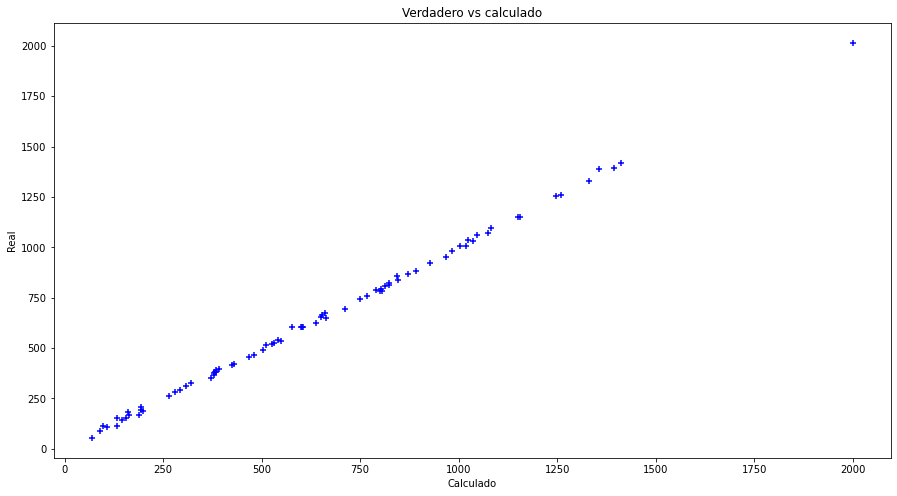

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, ypred, color="blue", marker="+", s=45)
ax.set_title("Verdadero vs calculado")
ax.set_ylabel("Real")
ax.set_xlabel("Calculado");

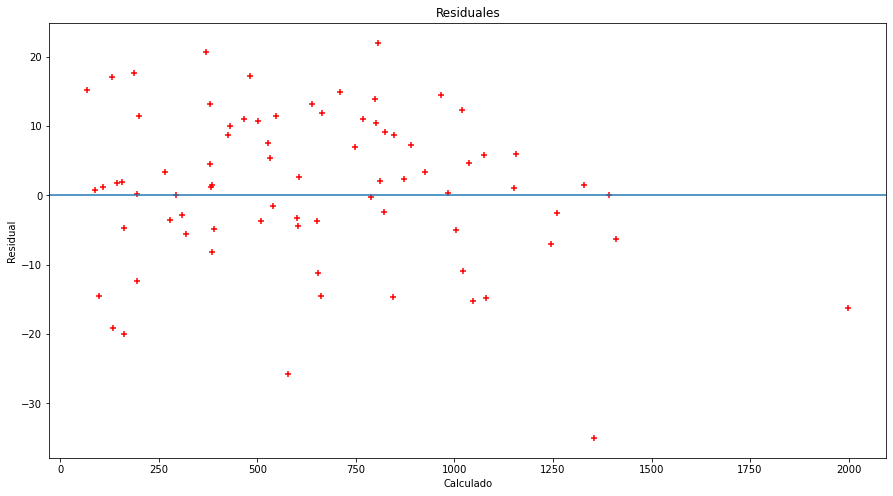

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, (y_test-ypred), color="red", marker="+", s=45)
ax.axhline(y=0)
ax.set_title("Residuales")
ax.set_ylabel("Residual")
ax.set_xlabel("Calculado");